# Vitamin Nutrition Food Program

Uses Selenium and Python to compile a list of foods with their respective nutrient from MyFoodData.com and places the list in excel workbooks based on their nutrient. https://tools.myfooddata.com/nutrient-ranking-tool

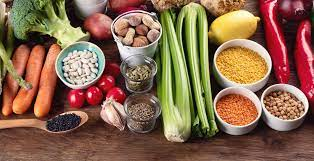

## Import the modules

In [21]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.wait import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

import pandas as pd

## Run the webdriver

In [3]:
driver = webdriver.Chrome()

## Food Groups

In [4]:
article_titles = ["Meats","Fish","Beans-and-Lentils","Dairy-And-Egg-Products", "Vegetables", "Fruits", "Nuts-and-Seeds", "Grains-and-Pasta"]

In [5]:
print("Total of " + str(len(article_titles)) + " food groups:")
for i in range(0, len(article_titles)):
    print(article_titles[i])

Total of 8 food groups:
Meats
Fish
Beans-and-Lentils
Dairy-And-Egg-Products
Vegetables
Fruits
Nuts-and-Seeds
Grains-and-Pasta


# Nutrients
## Vitamins

Vitamin-B6 and Vitamin-B12 do not work properly when running. You'll need to use html.

Food Source
= 

Select 1 of the food source methods

**The Standard Release:**
Foods from the the USDA Methods and Application of Food Composition Laboratory

In [7]:
source = "Common-SR"

# Run Report for mg Nutrients

In [19]:
mg_nutrients = ["Vitamin-C", "Vitamin-E", "Thiamin-B1", 
                 "Riboflavin-B2", "Niacin-B3", "Pantothenic-Acid-B5",
                "Choline", ]

for i in range(0, len(mg_nutrients)):
    file = mg_nutrients[i] + "foods.xlsx"
    print(mg_nutrients[i])
    with pd.ExcelWriter(file) as writer:
        for j in range(0, len(article_titles)):
            driver.get("https://tools.myfooddata.com/nutrient-ranking-tool/" + mg_nutrients[i] + "/" + article_titles[j] + "/Highest/Household/" + source + "/No")
            
            food = []
            description = []

            page1 = driver.find_elements(By.XPATH, '//span[@property="name"]')
            for t in range(len(page1)):
                food.append(page1[t].text)
    
            page1 = driver.find_elements(By.XPATH, '//div[@property="description"]')
            for t in range(len(page1)):
                description.append(page1[t].text)
    
            foods = list(food)
            descriptions = list(description)
            
            x = []

            for k in range(0, len(description)):
                x.append(descriptions[k].split(" ", 1))

            mg = []

            for k in range(0, len(x)):
                for l in range(1):
                    mg.append(x[k][l])
                    mg[k] = mg[k][:-2]

            new_description = []

            for k in range(0, len(x)):
                for l in range(1):
                    new_description.append(x[k][l+1])

            x2 = []

            for k in range(0, len(new_description)):
                x2.append(new_description[k].split("in ", 1))

            unit = []

            for k in range(0, len(x2)):
                for l in range(1):
                    unit.append(x2[k][l+1])

            for k in range(0, len(unit)):
                a = unit[k]
                if '16oz' in unit[k]:
                    unit[k] = a[:2] + " " + a[2:]
                elif '6oz' in unit[k]:
                    unit[k] = a[:1] + " " +a[1:]
                elif '5oz' in unit[k]:
                    unit[k] = "5 " + a[1:]
                elif '3oz' in unit[k]:
                    unit[k] = "3 " + a[1:]
                elif '1oz' in unit[k]:
                    unit[k] = "1 " + a[1:]
                elif '0.99' in unit[k]:
                    unit[k] = "1" + a[4:]
                elif a[0:3] == '1/5':
                    unit[k] = "0.20 " + a[4:]
                elif a[0:3] == '1/4':
                    unit[k] = "0.25 " + a[4:]
                elif a[0:3] == '1/3':
                    unit[k] = "0.33 " + a[4:]
                elif a[0:3] == '1/2':
                    unit[k] = "0.50 " + a[4:]
                elif unit[k] == 'oz':
                    unit[k] = "1 oz " + a[4:]
                elif a[0:2] == "fl":
                    unit[k] == "1 fl " + a[3:]
                elif a[0:4] == "1/ 3":
                    unit[k] == "0.33 " + a[5:]

            x3 = []

            for k in range(0, len(unit)):
                x3.append(unit[k].split(" ", 1))

            portion = []

            for k in range(0, len(x3)):
                for l in range(1):
                    portion.append(x3[k][l])

            unit = []

            for k in range(0, len(x3)):
                for l in range(1):
                    unit.append(x3[k][l+1])

            d = {'Food':foods,'mg': mg, 'Portion':portion, 'Unit':unit}

            df = pd.DataFrame(d)
            
            print("Found " + str(len(foods)) + " " + article_titles[j])
        
            df.to_excel(writer, sheet_name=article_titles[j], index = False)
    writer.close()
    print()
print("... Compile Complete!")

Vitamin-C
Found 200 Meats
Found 104 Fish
Found 135 Beans-and-Lentils
Found 98 Dairy-And-Egg-Products
Found 200 Vegetables
Found 200 Fruits
Found 93 Nuts-and-Seeds
Found 6 Grains-and-Pasta

Vitamin-E
Found 200 Meats
Found 125 Fish
Found 132 Beans-and-Lentils
Found 154 Dairy-And-Egg-Products
Found 200 Vegetables
Found 200 Fruits
Found 67 Nuts-and-Seeds
Found 113 Grains-and-Pasta

Thiamin-B1
Found 200 Meats
Found 133 Fish
Found 200 Beans-and-Lentils
Found 85 Dairy-And-Egg-Products
Found 200 Vegetables
Found 147 Fruits
Found 94 Nuts-and-Seeds
Found 160 Grains-and-Pasta

Riboflavin-B2
Found 200 Meats
Found 196 Fish
Found 200 Beans-and-Lentils
Found 200 Dairy-And-Egg-Products
Found 200 Vegetables
Found 190 Fruits
Found 71 Nuts-and-Seeds
Found 144 Grains-and-Pasta

Niacin-B3
Found 200 Meats
Found 200 Fish
Found 200 Beans-and-Lentils
Found 157 Dairy-And-Egg-Products
Found 200 Vegetables
Found 200 Fruits
Found 135 Nuts-and-Seeds
Found 178 Grains-and-Pasta

Pantothenic-Acid-B5
Found 200 Meats
Fo

# Run Report for mcg Nutrients

In [8]:
mcg_nutrients = ["Vitamin-D3-Cholecalciferol", "Vitamin-D2-Ergocalciferol",
                "Vitamin-K1-Dihydrophylloquinone", "Menaquinone-4"]

for i in range(0, len(mcg_nutrients)):
    file = mcg_nutrients[i] + "foods.xlsx"
    print(mcg_nutrients[i])
    with pd.ExcelWriter(file) as writer:
        for j in range(0, len(article_titles)):
            driver.get("https://tools.myfooddata.com/nutrient-ranking-tool/" + mcg_nutrients[i] + "/" + article_titles[j] + "/Highest/Household/" + source + "/No")
            
            food = []
            description = []

            page1 = driver.find_elements(By.XPATH, '//span[@property="name"]')
            for t in range(len(page1)):
                food.append(page1[t].text)
    
            page1 = driver.find_elements(By.XPATH, '//div[@property="description"]')
            for t in range(len(page1)):
                description.append(page1[t].text)
    
            foods = list(food)
            descriptions = list(description)
            
            x = []

            for k in range(0, len(description)):
                x.append(descriptions[k].split(" ", 1))

            mcg = []

            for k in range(0, len(x)):
                for l in range(1):
                    mcg.append(x[k][l])
                    mcg[k] = mcg[k][:-3]

            new_description = []

            for k in range(0, len(x)):
                for l in range(1):
                    new_description.append(x[k][l+1])

            x2 = []

            for k in range(0, len(new_description)):
                x2.append(new_description[k].split("in ", 1))

            unit = []

            for k in range(0, len(x2)):
                for l in range(1):
                    unit.append(x2[k][l+1])

            for k in range(0, len(unit)):
                a = unit[k]
                if '16oz' in unit[k]:
                    unit[k] = a[:2] + " " + a[2:]
                elif '6oz' in unit[k]:
                    unit[k] = a[:1] + " " +a[1:]
                elif '5oz' in unit[k]:
                    unit[k] = "5 " + a[1:]
                elif '3oz' in unit[k]:
                    unit[k] = "3 " + a[1:]
                elif '1oz' in unit[k]:
                    unit[k] = "1 " + a[1:]
                elif '0.99' in unit[k]:
                    unit[k] = "1" + a[4:]
                elif a[0:3] == '1/5':
                    unit[k] = "0.20 " + a[4:]
                elif a[0:3] == '1/4':
                    unit[k] = "0.25 " + a[4:]
                elif a[0:3] == '1/3':
                    unit[k] = "0.33 " + a[4:]
                elif a[0:3] == '1/2':
                    unit[k] = "0.50 " + a[4:]
                elif unit[k] == 'oz':
                    unit[k] = "1 oz " + a[4:]
                elif a[0:2] == "fl":
                    unit[k] == "1 fl " + a[3:]
                elif a[0:4] == "1/ 3":
                    unit[k] == "0.33 " + a[5:]

            x3 = []

            for k in range(0, len(unit)):
                x3.append(unit[k].split(" ", 1))

            portion = []

            for k in range(0, len(x3)):
                for l in range(1):
                    portion.append(x3[k][l])

            unit = []

            for k in range(0, len(x3)):
                for l in range(1):
                    unit.append(x3[k][l+1])

            d = {'Food':foods,'mcg': mcg, 'Portion':portion, 'Unit':unit}

            df = pd.DataFrame(d)
            
            print("Found " + str(len(foods)) + " " + article_titles[j])
        
            df.to_excel(writer, sheet_name=article_titles[j], index = False)
    writer.close()
    print()
print("... Compile Complete!")

Vitamin-D3-Cholecalciferol
Found 200 Meats
Found 90 Fish
Found 0 Beans-and-Lentils
Found 136 Dairy-And-Egg-Products
Found 9 Vegetables
Found 1 Fruits
Found 0 Nuts-and-Seeds
Found 0 Grains-and-Pasta

Vitamin-D2-Ergocalciferol


D:\Users\kyles\anaconda3\lib\site-packages\xlsxwriter\workbook.py:339: UserWarning: Calling close() on already closed file.
  warn("Calling close() on already closed file.")


Found 0 Meats
Found 0 Fish
Found 10 Beans-and-Lentils
Found 1 Dairy-And-Egg-Products
Found 22 Vegetables
Found 0 Fruits
Found 0 Nuts-and-Seeds
Found 0 Grains-and-Pasta

Vitamin-K1-Dihydrophylloquinone
Found 4 Meats
Found 1 Fish
Found 3 Beans-and-Lentils
Found 5 Dairy-And-Egg-Products
Found 16 Vegetables
Found 1 Fruits
Found 0 Nuts-and-Seeds
Found 4 Grains-and-Pasta

Menaquinone-4
Found 139 Meats
Found 15 Fish
Found 0 Beans-and-Lentils
Found 24 Dairy-And-Egg-Products
Found 8 Vegetables
Found 1 Fruits
Found 0 Nuts-and-Seeds
Found 3 Grains-and-Pasta

... Compile Complete!


# Run Report for Vitamin B6

Vitamin-B6 breaks the chain. To Run the report, you need to do the following. 
#### 1. Run the first block of code.

In [9]:
article_titles = ["Meats","Fish","Beans-and-Lentils","Dairy-And-Egg-Products", "Nuts-and-Seeds", "Grains-and-Pasta", ]

file = "Vitamin-B6foods1.xlsx"
with pd.ExcelWriter(file) as writer:
    for i in range(0, len(article_titles)):
        driver.get("https://tools.myfooddata.com/nutrient-ranking-tool/Vitamin-B6/" + article_titles[i] + "/Highest/Household/" + source + "/No")

        food = []
        description = []

        page1 = driver.find_elements(By.XPATH, '//span[@property="name"]')
        for t in range(len(page1)):
            food.append(page1[t].text)

        page1 = driver.find_elements(By.XPATH, '//div[@property="description"]')
        for t in range(len(page1)):
            description.append(page1[t].text)

        foods = list(food)
        descriptions = list(description)

        x = []

        for k in range(0, len(description)):
            x.append(descriptions[k].split(" ", 1))

        mg = []

        for k in range(0, len(x)):
            for l in range(1):
                mg.append(x[k][l])
                mg[k] = mg[k][:-2]

        new_description = []

        for k in range(0, len(x)):
            for l in range(1):
                new_description.append(x[k][l+1])

        x2 = []

        for k in range(0, len(new_description)):
            x2.append(new_description[k].split("in ", 1))

        unit = []

        for k in range(0, len(x2)):
            for l in range(1):
                unit.append(x2[k][l+1])

        for k in range(0, len(unit)):
            a = unit[k]
            if '16oz' in unit[k]:
                unit[k] = a[:2] + " " + a[2:]
            elif '6oz' in unit[k]:
                unit[k] = a[:1] + " " +a[1:]
            elif '5oz' in unit[k]:
                unit[k] = "5 " + a[1:]
            elif '3oz' in unit[k]:
                unit[k] = "3 " + a[1:]
            elif '1oz' in unit[k]:
                unit[k] = "1 " + a[1:]
            elif '0.99' in unit[k]:
                unit[k] = "1" + a[4:]
            elif a[0:3] == '1/5':
                unit[k] = "0.20 " + a[4:]
            elif a[0:3] == '1/4':
                unit[k] = "0.25 " + a[4:]
            elif a[0:3] == '1/3':
                unit[k] = "0.33 " + a[4:]
            elif a[0:3] == '1/2':
                unit[k] = "0.50 " + a[4:]
            elif unit[k] == 'oz':
                unit[k] = "1 oz " + a[4:]
            elif a[0:2] == "fl":
                unit[k] == "1 fl " + a[3:]
            elif a[0:4] == "1/ 3":
                unit[k] == "0.33 " + a[5:]

        x3 = []

        for k in range(0, len(unit)):
            x3.append(unit[k].split(" ", 1))

        portion = []

        for k in range(0, len(x3)):
            for l in range(1):
                portion.append(x3[k][l])

        unit = []

        for k in range(0, len(x3)):
            for l in range(1):
                unit.append(x3[k][l+1])

        d = {'Food':foods,'mg': mg, 'Portion':portion, 'Unit':unit}

        df = pd.DataFrame(d)

        df.to_excel(writer, sheet_name=article_titles[i], index = False)

        print("Found " + str(len(foods)) + " " + article_titles[i])
writer.close()
print("... Compile Complete!")

Found 200 Meats
Found 200 Fish
Found 200 Beans-and-Lentils
Found 127 Dairy-And-Egg-Products
Found 97 Nuts-and-Seeds
Found 147 Grains-and-Pasta
... Compile Complete!


#### 2. Close the current chrome webdriver and run the block of code below.

In [10]:
driver = webdriver.Chrome()

driver.get("https://tools.myfooddata.com/nutrient-ranking-tool/Vitamin-B6/Vegetables/Highest/Household/Common-SR/No")

#### 3. Go to the webdriver that is currently open and make it full screen. Right click on the page and choose inspect. Wait for a second and then minimize the screen. Run the blocks of code below.

In [11]:
WebDriverWait(driver, 20).until(EC.element_to_be_clickable((By.XPATH, "//*[@id='rankingform']/div[2]/label[1]"))).click()

In [12]:
file = "Vitamin-B6foods2.xlsx"
with pd.ExcelWriter(file) as writer:
    article_titles = ["Vegetables"]

    food = []
    description = []

    page1 = driver.find_elements(By.XPATH, '//span[@property="name"]')
    for t in range(len(page1)):
        food.append(page1[t].text)

    page1 = driver.find_elements(By.XPATH, '//div[@property="description"]')
    for t in range(len(page1)):
        description.append(page1[t].text)

    foods = list(food)
    descriptions = list(description)

    x = []

    for k in range(0, len(description)):
        x.append(descriptions[k].split(" ", 1))

    mg = []

    for k in range(0, len(x)):
        for l in range(1):
            mg.append(x[k][l])
            mg[k] = mg[k][:-2]

    new_description = []

    for k in range(0, len(x)):
        for l in range(1):
            new_description.append(x[k][l+1])

    x2 = []

    for k in range(0, len(new_description)):
        x2.append(new_description[k].split("in ", 1))

    unit = []

    for k in range(0, len(x2)):
        for l in range(1):
            unit.append(x2[k][l+1])

    for k in range(0, len(unit)):
        a = unit[k]
        if '16oz' in unit[k]:
            unit[k] = a[:2] + " " + a[2:]
        elif '6oz' in unit[k]:
            unit[k] = a[:1] + " " +a[1:]
        elif '5oz' in unit[k]:
            unit[k] = "5 " + a[1:]
        elif '3oz' in unit[k]:
            unit[k] = "3 " + a[1:]
        elif '1oz' in unit[k]:
            unit[k] = "1 " + a[1:]
        elif '0.99' in unit[k]:
            unit[k] = "1" + a[4:]
        elif a[0:3] == '1/5':
            unit[k] = "0.20 " + a[4:]
        elif a[0:3] == '1/4':
            unit[k] = "0.25 " + a[4:]
        elif a[0:3] == '1/3':
            unit[k] = "0.33 " + a[4:]
        elif a[0:3] == '1/2':
            unit[k] = "0.50 " + a[4:]
        elif unit[k] == 'oz':
            unit[k] = "1 oz " + a[4:]
        elif a[0:2] == "fl":
            unit[k] == "1 fl " + a[3:]
        elif a[0:4] == "1/ 3":
            unit[k] == "0.33 " + a[5:]

    x3 = []

    for k in range(0, len(unit)):
        x3.append(unit[k].split(" ", 1))

    portion = []

    for k in range(0, len(x3)):
        for l in range(1):
            portion.append(x3[k][l])

    unit = []

    for k in range(0, len(x3)):
        for l in range(1):
            unit.append(x3[k][l+1])

    d = {'Food':foods,'mg': mg, 'Portion':portion, 'Unit':unit}

    df = pd.DataFrame(d)

    df.to_excel(writer, sheet_name=article_titles[0], index = False)
    
    print("Found " + str(len(foods)) + " " + article_titles[0])

writer.close()
print("... Compile Complete!")

Found 200 Vegetables
... Compile Complete!


#### 4. Follow Step 2 again.

In [13]:
driver = webdriver.Chrome()

driver.get("https://tools.myfooddata.com/nutrient-ranking-tool/Vitamin-B6/Fruits/Highest/Household/Common-SR/No")

#### 5. Follow Step 3 again.

In [14]:
WebDriverWait(driver, 20).until(EC.element_to_be_clickable((By.XPATH, "//*[@id='rankingform']/div[2]/label[1]"))).click()

In [15]:
file = "Vitamin-B6foods3.xlsx"
with pd.ExcelWriter(file) as writer:
    article_titles = ["Fruits"]

    food = []
    description = []

    page1 = driver.find_elements(By.XPATH, '//span[@property="name"]')
    for t in range(len(page1)):
        food.append(page1[t].text)

    page1 = driver.find_elements(By.XPATH, '//div[@property="description"]')
    for t in range(len(page1)):
        description.append(page1[t].text)

    foods = list(food)
    descriptions = list(description)

    x = []

    for k in range(0, len(description)):
        x.append(descriptions[k].split(" ", 1))

    mg = []

    for k in range(0, len(x)):
        for l in range(1):
            mg.append(x[k][l])
            mg[k] = mg[k][:-2]

    new_description = []

    for k in range(0, len(x)):
        for l in range(1):
            new_description.append(x[k][l+1])

    x2 = []

    for k in range(0, len(new_description)):
        x2.append(new_description[k].split("in ", 1))

    unit = []

    for k in range(0, len(x2)):
        for l in range(1):
            unit.append(x2[k][l+1])

    for k in range(0, len(unit)):
        a = unit[k]
        if '16oz' in unit[k]:
            unit[k] = a[:2] + " " + a[2:]
        elif '6oz' in unit[k]:
            unit[k] = a[:1] + " " +a[1:]
        elif '5oz' in unit[k]:
            unit[k] = "5 " + a[1:]
        elif '3oz' in unit[k]:
            unit[k] = "3 " + a[1:]
        elif '1oz' in unit[k]:
            unit[k] = "1 " + a[1:]
        elif '0.99' in unit[k]:
            unit[k] = "1" + a[4:]
        elif a[0:3] == '1/5':
            unit[k] = "0.20 " + a[4:]
        elif a[0:3] == '1/4':
            unit[k] = "0.25 " + a[4:]
        elif a[0:3] == '1/3':
            unit[k] = "0.33 " + a[4:]
        elif a[0:3] == '1/2':
            unit[k] = "0.50 " + a[4:]
        elif unit[k] == 'oz':
            unit[k] = "1 oz " + a[4:]
        elif a[0:2] == "fl":
            unit[k] == "1 fl " + a[3:]
        elif a[0:4] == "1/ 3":
            unit[k] == "0.33 " + a[5:]

    x3 = []

    for k in range(0, len(unit)):
        x3.append(unit[k].split(" ", 1))

    portion = []

    for k in range(0, len(x3)):
        for l in range(1):
            portion.append(x3[k][l])

    unit = []

    for k in range(0, len(x3)):
        for l in range(1):
            unit.append(x3[k][l+1])

    d = {'Food':foods,'mg': mg, 'Portion':portion, 'Unit':unit}

    df = pd.DataFrame(d)

    df.to_excel(writer, sheet_name=article_titles[0], index = False)
    
    print("Found " + str(len(foods)) + " " + article_titles[0])

writer.close()
print("... Compile Complete!")

Found 200 Fruits
... Compile Complete!


# Run Report for Vitamin B12

Vitamin-B12 breaks the chain. To Run the report, you need to follow similar pattern as you did for Vitamin-B6.

In [16]:
article_titles = ["Meats","Fish","Beans-and-Lentils","Dairy-And-Egg-Products", "Vegetables", "Nuts-and-Seeds", "Grains-and-Pasta"]

file = "Vitamin-B12foods1.xlsx"
with pd.ExcelWriter(file) as writer:
    for i in range(0, len(article_titles)):
        driver.get("https://tools.myfooddata.com/nutrient-ranking-tool/Vitamin-B12/" + article_titles[i] + "/Highest/Household/" + source + "/No")

        food = []
        description = []

        page1 = driver.find_elements(By.XPATH, '//span[@property="name"]')
        for t in range(len(page1)):
            food.append(page1[t].text)

        page1 = driver.find_elements(By.XPATH, '//div[@property="description"]')
        for t in range(len(page1)):
            description.append(page1[t].text)

        foods = list(food)
        descriptions = list(description)

        x = []

        for k in range(0, len(description)):
            x.append(descriptions[k].split(" ", 1))

        mcg = []

        for k in range(0, len(x)):
            for l in range(1):
                mcg.append(x[k][l])
                mcg[k] = mcg[k][:-2]

        new_description = []

        for k in range(0, len(x)):
            for l in range(1):
                new_description.append(x[k][l+1])

        x2 = []

        for k in range(0, len(new_description)):
            x2.append(new_description[k].split("in ", 1))

        unit = []

        for k in range(0, len(x2)):
            for l in range(1):
                unit.append(x2[k][l+1])

        for k in range(0, len(unit)):
            a = unit[k]
            if '16oz' in unit[k]:
                unit[k] = a[:2] + " " + a[2:]
            elif '6oz' in unit[k]:
                unit[k] = a[:1] + " " +a[1:]
            elif '5oz' in unit[k]:
                unit[k] = "5 " + a[1:]
            elif '3oz' in unit[k]:
                unit[k] = "3 " + a[1:]
            elif '1oz' in unit[k]:
                unit[k] = "1 " + a[1:]
            elif '0.99' in unit[k]:
                unit[k] = "1" + a[4:]
            elif a[0:3] == '1/5':
                unit[k] = "0.20 " + a[4:]
            elif a[0:3] == '1/4':
                unit[k] = "0.25 " + a[4:]
            elif a[0:3] == '1/3':
                unit[k] = "0.33 " + a[4:]
            elif a[0:3] == '1/2':
                unit[k] = "0.50 " + a[4:]
            elif unit[k] == 'oz':
                unit[k] = "1 oz " + a[4:]
            elif a[0:2] == "fl":
                unit[k] == "1 fl " + a[3:]
            elif a[0:4] == "1/ 3":
                unit[k] == "0.33 " + a[5:]  

        x3 = []

        for k in range(0, len(unit)):
            x3.append(unit[k].split(" ", 1))

        portion = []

        for k in range(0, len(x3)):
            for l in range(1):
                portion.append(x3[k][l])

        unit = []

        for k in range(0, len(x3)):
            for l in range(1):
                unit.append(x3[k][l+1])

        d = {'Food':foods,'mcg': mcg, 'Portion':portion, 'Unit':unit}

        df = pd.DataFrame(d)

        df.to_excel(writer, sheet_name=article_titles[i], index = False)

        print("Found " + str(len(foods)) + " " + article_titles[i])
writer.close()
print("... Compile Complete!")

Found 200 Meats
Found 200 Fish
Found 44 Beans-and-Lentils
Found 200 Dairy-And-Egg-Products
Found 14 Vegetables
Found 1 Nuts-and-Seeds
Found 13 Grains-and-Pasta
... Compile Complete!


In [17]:
driver = webdriver.Chrome()

driver.get("https://tools.myfooddata.com/nutrient-ranking-tool/Vitamin-B12/Fruits/Highest/Household/Common-SR/No")

In [19]:
WebDriverWait(driver, 20).until(EC.element_to_be_clickable((By.XPATH, "//*[@id='rankingform']/div[2]/label[1]"))).click()

In [20]:
article_titles = ["Fruits"]

file = "Vitamin-B12foods2.xlsx"
with pd.ExcelWriter(file) as writer:

    food = []
    description = []

    page1 = driver.find_elements(By.XPATH, '//span[@property="name"]')
    for t in range(len(page1)):
        food.append(page1[t].text)

    page1 = driver.find_elements(By.XPATH, '//div[@property="description"]')
    for t in range(len(page1)):
        description.append(page1[t].text)

    foods = list(food)
    descriptions = list(description)

    x = []

    for k in range(0, len(description)):
        x.append(descriptions[k].split(" ", 1))

    mcg = []

    for k in range(0, len(x)):
        for l in range(1):
            mcg.append(x[k][l])
            mcg[k] = mcg[k][:-2]

    new_description = []

    for k in range(0, len(x)):
        for l in range(1):
            new_description.append(x[k][l+1])

    x2 = []

    for k in range(0, len(new_description)):
        x2.append(new_description[k].split("in ", 1))

    unit = []

    for k in range(0, len(x2)):
        for l in range(1):
            unit.append(x2[k][l+1])

    for k in range(0, len(unit)):
        a = unit[k]
        if '16oz' in unit[k]:
            unit[k] = a[:2] + " " + a[2:]
        elif '6oz' in unit[k]:
            unit[k] = a[:1] + " " +a[1:]
        elif '5oz' in unit[k]:
            unit[k] = "5 " + a[1:]
        elif '3oz' in unit[k]:
            unit[k] = "3 " + a[1:]
        elif '1oz' in unit[k]:
            unit[k] = "1 " + a[1:]
        elif '0.99' in unit[k]:
            unit[k] = "1" + a[4:]
        elif a[0:3] == '1/5':
            unit[k] = "0.20 " + a[4:]
        elif a[0:3] == '1/4':
            unit[k] = "0.25 " + a[4:]
        elif a[0:3] == '1/3':
            unit[k] = "0.33 " + a[4:]
        elif a[0:3] == '1/2':
            unit[k] = "0.50 " + a[4:]
        elif unit[k] == 'oz':
            unit[k] = "1 oz " + a[4:]
        elif a[0:2] == "fl":
            unit[k] == "1 fl " + a[3:]
        elif a[0:4] == "1/ 3":
            unit[k] == "0.33 " + a[5:]  

    x3 = []

    for k in range(0, len(unit)):
        x3.append(unit[k].split(" ", 1))

    portion = []

    for k in range(0, len(x3)):
        for l in range(1):
            portion.append(x3[k][l])

    unit = []

    for k in range(0, len(x3)):
        for l in range(1):
            unit.append(x3[k][l+1])

    d = {'Food':foods,'mcg': mcg, 'Portion':portion, 'Unit':unit}

    df = pd.DataFrame(d)

    df.to_excel(writer, sheet_name=article_titles[0], index = False)

    print("Found " + str(len(foods)) + " " + article_titles[0])
writer.close()
print("... Compile Complete!")

Found 5 Fruits
... Compile Complete!
